# Generate x_train, y_train

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

count = 100
# Gen x_train
x_train = np.linspace(0, 1000, count).astype(int)

# Gen y_train, y = 2x + 3
y_train = 2 * x_train + 3

error_mean = 200
error_std = 50
random_error = np.random.normal(error_mean, error_std, count)
y_train = y_train + random_error

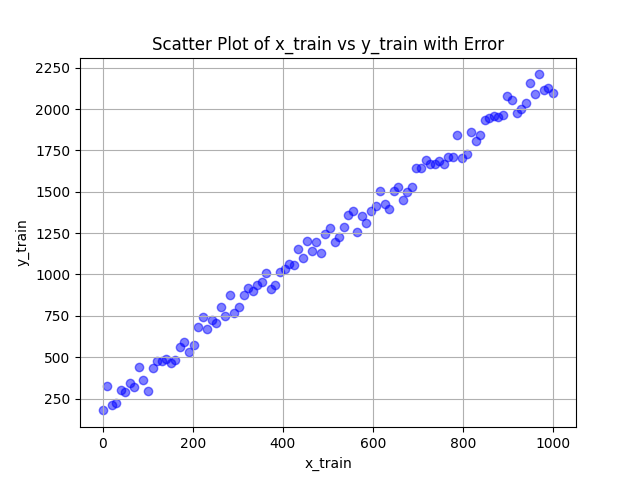

In [36]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color='blue', alpha=0.5)  # Scatter plot of x_train vs y_train
ax.set_title('Scatter Plot of x_train vs y_train with Error')
ax.set_xlabel('x_train')
ax.set_ylabel('y_train')
ax.grid(True)  # Enable grid for better visualization
plt.show()

# Cost function

The cost function, often expressed as the sum of squared residuals (SSR) or mean squared error (MSE) when averaged, is defined by:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2
$$


To derive the slope \( w \) in the context of linear regression, follow these steps:

1. **Start from the normal equations**:

   Take the derivative with respect to \( w \) and set it to zero:
   $$
   \sum x_i y_i - w \sum x_i^2 - b \sum x_i = 0
   $$

   Take the derivative with respect to \( b \) and set it to zero:
   $$
   \sum y_i - w \sum x_i - n b = 0
   $$

2. **Solve for \( w \) and \( b \)**:
   From the second equation, solve for \( b \):
   $$
   b = \frac{\sum y_i - w \sum x_i}{n}
   $$

   Substitute \( b \) in the first equation and solve for \( w \):
   $$
   \sum x_i y_i = w \sum x_i^2 + \left(\frac{\sum y_i - w \sum x_i}{n}\right) \sum x_i
   $$
   Simplify and solve for \( w \):
   $$
   \sum x_i y_i = w \sum x_i^2 + \frac{\sum y_i \sum x_i}{n} - \frac{w (\sum x_i)^2}{n}
   $$
   $$
   \sum x_i y_i - \frac{\sum y_i \sum x_i}{n} = w \left(\sum x_i^2 - \frac{(\sum x_i)^2}{n}\right)
   $$
   $$
   w = \frac{\sum x_i y_i - \frac{\sum y_i \sum x_i}{n}}{\sum x_i^2 - \frac{(\sum x_i)^2}{n}}
   $$

3. **Simplify \( w \)**:
   given:
   $$
   \sum y_i = n \bar{y_i}
   $$
   $$
   \sum x_i = n \bar{x_i}
   $$
   $$
   \sum{x_i y_i} = n \bar{x y}
   $$

   simplify:
   $$
   \sum x_i y_i = n * \bar{xy}
   $$

   $$
   \frac{\sum y_i \sum x_i}{n} = \frac{n^2 \bar{x} \bar{y}}{n} = n \bar{x} \bar{y}
   $$

   $$
   \sum x_i^2 = n \bar{x^2}
   $$

   $$
   \sum x_i^2 = n \bar{x^2}
   $$

   final term:
   $$
   w = \frac{\bar{xy} - \bar{x} \bar{y}}{\bar{x^2} - \bar{x}^2}
   $$

   $$
   b = \bar{y} - w \bar{x}
   $$

This approach to deriving \( w \) focuses on algebraic manipulation and simplification directly from the sum products and sums of squares of the variables, avoiding the statistical concepts of covariance and variance.


In [37]:
# Compute w and b based on the formula
def compute_w_b(x_train, y_train):
    xy_bar = np.dot(x_train, y_train) / x_train.shape
    x_bar = x_train.mean()
    y_bar = y_train.mean()
    numerator = xy_bar - x_bar * y_bar

    x_square_bar = np.mean(x_train * x_train)
    x_bar_square = x_bar * x_bar
    denominator = x_square_bar - x_bar_square

    w = numerator / denominator
    b = y_bar - w * x_bar
    return w, b

w, b = compute_w_b(x_train, y_train)

# Compute y
y = x_train * w + b


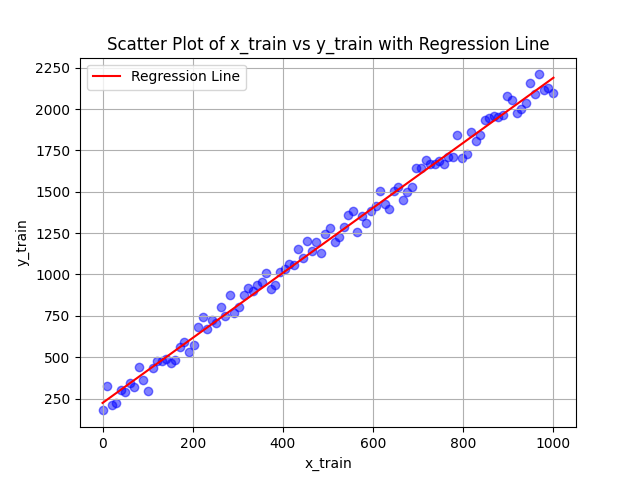

In [41]:
fig, ax = plt.subplots()

# Plot the scatter plot of the original data
ax.scatter(x_train, y_train, color='blue', alpha=0.5)

# Plot the regression line
ax.plot(x_train, y, color='red', label='Regression Line')

# Set titles and labels
ax.set_title('Scatter Plot of x_train vs y_train with Regression Line')
ax.set_xlabel('x_train')
ax.set_ylabel('y_train')

# Enable grid for better visualization
ax.grid(True)

# Add a legend to distinguish plots
ax.legend()

# Show the plot
plt.show()